# Phase 1 Aviation Project Description

## Project Overview

For this project, we will use data cleaning, imputation, analysis, and visualization to generate insights for a business stakeholder.

### Business Problem

Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

### The Data

In the `data` folder is a [dataset](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

It is up to you to decide what data to use, how to deal with missing values, how to aggregate the data, and how to visualize it in an interactive dashboard.

In [1]:
import pandas as pd
Aviation_df = pd.read_csv("data/Aviation_Data.csv")

C:\Users\david.munyiri\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
#Check the size of the Aviation raw data
Aviation_df.shape

(90348, 31)

In [3]:
#View a sample of the Aviation 
Aviation_df.head(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.4453,-70.7583,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982


In [4]:
#View the all the columns of the 
Aviation_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [5]:
#Get information on the data types and content in different columns
Aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

# Data Cleaning

In [6]:
def clean(col_name):
    # Clean the column name in any way you want to remove any spaces
    cleaned = col_name.strip()
    return cleaned

In [7]:
#Change all the data into lower case
Aviation_df[Aviation_df.select_dtypes(include='object').columns] = Aviation_df.select_dtypes(include='object').apply(lambda col: col.str.lower())

In [8]:
# Use the above function to clean the column names
Aviation_df.columns = [clean(col) for col in Aviation_df.columns] 

In [9]:
#Convert date columns into the correct date types
Aviation_df[['Event.Date', 'Publication.Date']] = Aviation_df[['Event.Date', 'Publication.Date']].apply(pd.to_datetime, errors='coerce')

Check rows required for client recomendation for Null values and drop them as recommendation cannot be done without these values
1. Make                       
2. Model
3. Aircraft Category

In [10]:
#check for empty cells
Aviation_df.isna().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55975
Longitude                 55984
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

In [11]:
# Drop rows with missing core values of Make, Model, Aircraft Category requird for recommendation
Aviation_df.dropna(subset=["Make"], inplace=True)
Aviation_df.dropna(subset=["Model"], inplace=True)
Aviation_df.dropna(subset=["Aircraft.Category"], inplace=True)

In [12]:
Aviation_df.shape

(32245, 31)

In [13]:
Aviation_df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      9
Country                      12
Latitude                   6293
Longitude                  6303
Airport.Code              12648
Airport.Name              12091
Injury.Severity             882
Aircraft.damage            1455
Aircraft.Category             0
Registration.Number         270
Make                          0
Model                         0
Amateur.Built                19
Number.of.Engines          3452
Engine.Type                5525
FAR.Description             608
Schedule                  28765
Purpose.of.flight          4439
Air.carrier               18632
Total.Fatal.Injuries       3705
Total.Serious.Injuries     3712
Total.Minor.Injuries       3325
Total.Uninjured            1074
Weather.Condition          3654
Broad.phase.of.flight     24893
Report.Status              5949
Publication.Date           2647
dtype: i

In [14]:
#Drop rows without any Risk/Safety indicators i.e. fatalities, injuries, damage
Aviation_df = Aviation_df.dropna(subset=['Aircraft.damage', 'Total.Fatal.Injuries', 
                                         'Total.Serious.Injuries','Total.Minor.Injuries',
                                         'Total.Uninjured'], how='all')

In [15]:
Aviation_df.shape

(32227, 31)

In [16]:
Unique_Make, Make_count = Aviation_df['Make'].unique(), Aviation_df['Make'].value_counts()
Unique_Make, Make_count

(array(['mcdonnell douglas', 'cessna', 'bellanca', ..., 'greg hobbs',
        'james r dernovsek', 'orlican s r o'], dtype=object),
 cessna                       8471
 piper                        4714
 beech                        1691
 boeing                       1314
 bell                          912
                              ... 
 bosko wr/bosko ce               1
 sharp ralph r                   1
 gray jack                       1
 precision helicopters llc       1
 jonsson                         1
 Name: Make, Length: 4205, dtype: int64)

In [17]:
Unique_Model, Model_count = Aviation_df['Model'].unique(), Aviation_df['Model'].value_counts()
Unique_Model, Model_count

(array(['dc9', '140', '401b', ..., 'mh-60r', 'kitfox s5', 'm-8 eagle'],
       dtype=object),
 172                 870
 152                 451
 737                 404
 182                 345
 172n                316
                    ... 
 c-82a                 1
 td                    1
 tb10 - no series      1
 starduster ii         1
 air-bike              1
 Name: Model, Length: 6319, dtype: int64)

In [18]:
Unique_Aircraft_Category, Aircraft_Category_count = (Aviation_df['Aircraft.Category'].unique(), 
                                                     Aviation_df['Aircraft.Category'].value_counts())
Unique_Aircraft_Category, Aircraft_Category_count

(array(['airplane', 'helicopter', 'glider', 'balloon', 'gyrocraft',
        'ultralight', 'unknown', 'blimp', 'powered-lift', 'weight-shift',
        'powered parachute', 'rocket', 'wsft', 'unk', 'ultr'], dtype=object),
 airplane             27562
 helicopter            3435
 glider                 508
 balloon                231
 gyrocraft              173
 weight-shift           161
 powered parachute       91
 ultralight              30
 unknown                 14
 wsft                     9
 powered-lift             5
 blimp                    4
 unk                      2
 ultr                     1
 rocket                   1
 Name: Aircraft.Category, dtype: int64)

In [76]:
#Retain only airplane and helicopter categories
Aviation_df = Aviation_df[Aviation_df['Aircraft.Category'].str.strip().str.lower().isin(['airplane', 'helicopter'])]

#Concat make and model into new column inorder to easily get measures of central tendancy
Aviation_df['Make_Model'] = (df['Make'].astype(str) + ' ' + df['Model'].astype(str)).str.title()

# Data Modelling

In [77]:
#Creation and Visualization of models
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
# 1. Select relevant columns for analysis
cols = ['Make_Model','Aircraft.damage', 'Injury.Severity',
        'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries',
        'Total.Uninjured', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type']
df = Aviation_df[cols]

In [80]:
# 2. Accident frequency per Model
# How often each model appears (indicator of incident rate)
accident_counts = df['Make_Model'].value_counts()
accident_counts

Cessna 172                      867
Cessna 152                      450
Boeing 737                      404
Cessna 182                      345
Cessna 172N                     315
                               ... 
Kamtz Russell H Rv-6A             1
Rich Wheeler Express Ct           1
Piper Cub Crafters Pa-18-150      1
Vans Aircraft Rv6                 1
Piper Pa 32R 301T                 1
Name: Make_Model, Length: 8353, dtype: int64

In [96]:
# 3. Severe damage ratio per Model
# Percentage of incidents with damage = Substantial or Destroyed
damage_ratio = df.groupby('Make_Model')['Aircraft.damage'].apply(
    lambda x: (x.isin(['Substantial', 'Destroyed']).sum()) / len(x)
)

In [82]:
# 4. Fatal Injury Rate per Model
fatal_rate = df.groupby('Make_Model')['Total.Fatal.Injuries'].mean()

In [100]:
# 5. Severity Score (weighted)
# Fatal = 3 points, Serious = 2, Minor = 1
# Severity Score (weighted injuries)
df['Severity_Score'] = (df['Total.Fatal.Injuries']*3 +
                         df['Total.Serious.Injuries']*2 +
                         df['Total.Minor.Injuries'])
severity_score = df.groupby('Make_Model')['Severity_Score'].mean()

In [101]:
severity_score.head()

Make_Model
177Mf Llc Pitts Model 12       4.0
2007 Savage Air Llc Epic Lt    0.0
2021Fx3 Llc Ccx-2000           0.0
3Xtrim 450 Ultra               4.0
5 Rivers Llc Sq-2              1.0
Name: Severity_Score, dtype: float64

In [102]:

# 6. Amateur Built Ratio
amateur_ratio = df.groupby('Make_Model')['Amateur.Built'].apply(lambda x: (x == 'Yes').mean())


# 7. Engine configuration (mode for engines and type)
engine_config = df.groupby('Make_Model')[['Number.of.Engines','Engine.Type']].agg(
    lambda x: x.mode().iat[0] if not x.mode().empty else None
)


In [91]:
# 8. Combine all metrics into one DataFrame for ranking
summary = pd.DataFrame({
    'Accident_Count': accident_counts,
    'Severe_Damage_Ratio': damage_ratio,
    'Fatal_Rate': fatal_rate,
    'Severity_Score': severity_score,
    'Amateur_Ratio': amateur_ratio
}).fillna(0)

# Add engine info
summary = summary.merge(engine_config, left_index=True, right_index=True)

In [93]:
# 9. Rank models by safety
# Lower values for damage ratio, fatal rate, and severity score are better
summary['Safety_Score'] = (summary['Severe_Damage_Ratio']*3 +
                            summary['Fatal_Rate']*4 +
                            summary['Severity_Score']*2 +
                            summary['Amateur_Ratio']*2)

summary_sorted = summary.sort_values(by='Safety_Score', ascending=True)
print(summary_sorted.head(10))

                            Accident_Count  Severe_Damage_Ratio  Fatal_Rate  \
Gulfstream Gulfstream200                 3                  0.0         0.0   
Helmetag Glassair Iii                    1                  0.0         0.0   
Helmer Avid Magnum                       1                  0.0         0.0   
Helio H391                               1                  0.0         0.0   
Helio H-395                              3                  0.0         0.0   
Helio H-250                              1                  0.0         0.0   
Helio H 395                              1                  0.0         0.0   
Helie Rv-6                               1                  0.0         0.0   
Helicopteres Guimbal Cabri               1                  0.0         0.0   
Heinz Rans S-4 Coyote                    1                  0.0         0.0   

                            Severity_Score  Amateur_Ratio  Number.of.Engines  \
Gulfstream Gulfstream200               0.0        

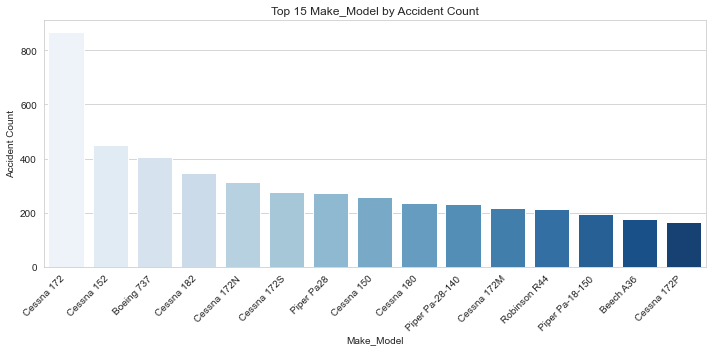

In [103]:
# VISUALIZATIONS
sns.set_style('whitegrid')

# 1. Accident Frequency Distribution
plt.figure(figsize=(10,5))
top_accidents = summary['Accident_Count'].sort_values(ascending=False).head(15)
sns.barplot(x=top_accidents.index, y=top_accidents.values, palette='Blues')
plt.xticks(rotation=45, ha='right')
plt.title('Top 15 Make_Model by Accident Count')
plt.ylabel('Accident Count')
plt.xlabel('Make_Model')
plt.tight_layout()
plt.show()

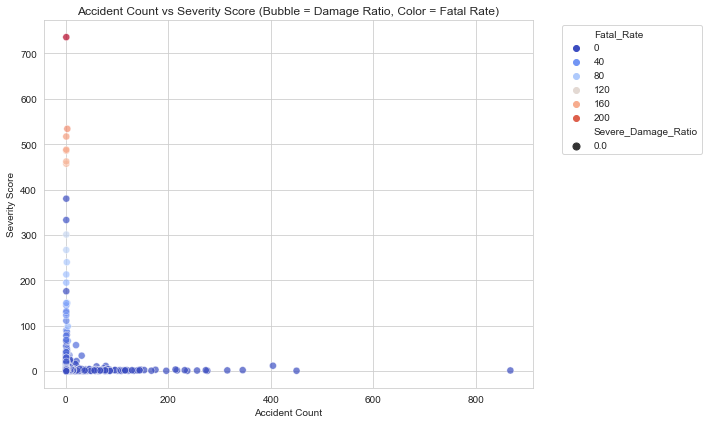

In [104]:
# 2. Scatter Plot: Accident Count vs Severity Score
plt.figure(figsize=(10,6))
sns.scatterplot(data=summary, x='Accident_Count', y='Severity_Score',
                size='Severe_Damage_Ratio', hue='Fatal_Rate', sizes=(50, 500),
                palette='coolwarm', alpha=0.7)
plt.title('Accident Count vs Severity Score (Bubble = Damage Ratio, Color = Fatal Rate)')
plt.xlabel('Accident Count')
plt.ylabel('Severity Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

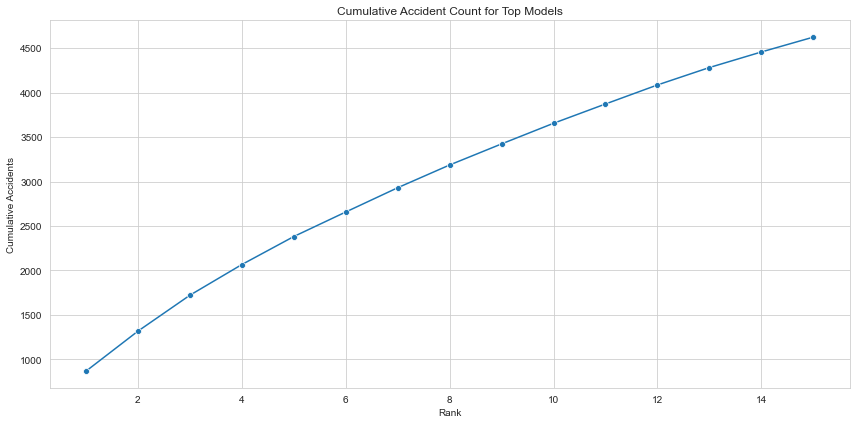

In [105]:
plt.figure(figsize=(12,6))
top_models = top_accidents.index
cumulative_accidents = top_accidents.cumsum()
sns.lineplot(x=range(1, len(cumulative_accidents)+1), y=cumulative_accidents.values, marker='o')
plt.title('Cumulative Accident Count for Top Models')
plt.ylabel('Cumulative Accidents')
plt.xlabel('Rank')
plt.grid(True)
plt.tight_layout()
plt.show()

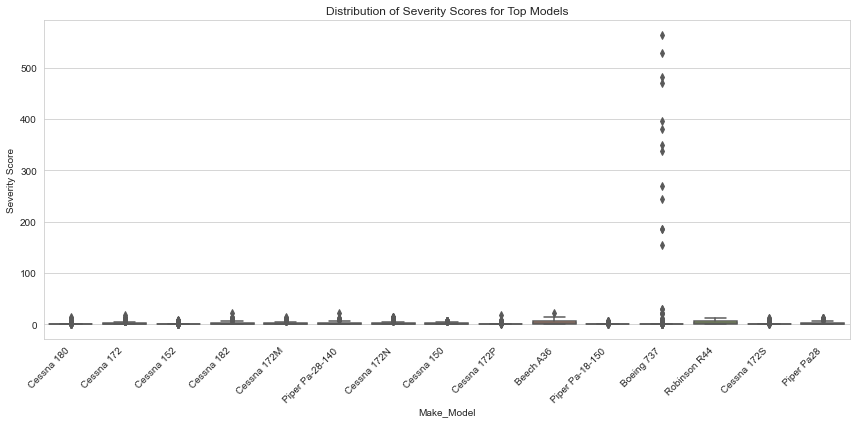

In [106]:
plt.figure(figsize=(12,6))
top_models_data = df[df['Make_Model'].isin(top_models)]
sns.boxplot(x='Make_Model', y='Severity_Score', data=top_models_data, palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Severity Scores for Top Models')
plt.ylabel('Severity Score')
plt.xlabel('Make_Model')
plt.tight_layout()
plt.show()

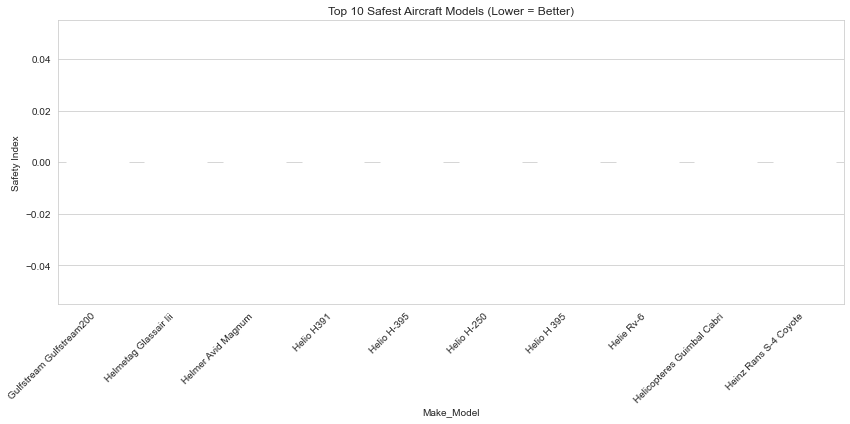

In [109]:
# 5. Bar Chart: Top 10 Safest Models by Safety Index
plt.figure(figsize=(12,6))
top_safest = summary_sorted.head(10)
sns.barplot(x=top_safest.index, y=top_safest['Safety_Score'], palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Safest Aircraft Models (Lower = Better)')
plt.ylabel('Safety Index')
plt.xlabel('Make_Model')
plt.tight_layout()
plt.show()